In [ ]:
#IDEE DA SVILLUPPARE
#1.Crea nuova colonna dataset in cui ogni riga c'è il numero di lettere del nome dell'animale
#2.Trova altri dati da aggiungere/dataset più grande o simile
#3.Guarda medium, datafish, towardsdatascience e altri
#5.Confrontare dati con i risultati di raggruppamenti e degli algoritmi
#9.il file piccolo è quello da usare per confrontare i risultati

<div class="alert alert-info" style="background-color:DodgerBlue; color:white; padding:0px 5px; border-radius:15px; opacity: 0.8; border-color:DodgerBlue">
    <h2 style='margin:10px 5px; font-size:35px; text-align: center'> Progetto Finale - Programming with Python 
    </h2>
</div>

<div class="alert alert-info" style="background-color:orange; color:black; padding:0px 5px; border-radius:15px; border-color:orange">
    <h2 style='margin:10px 5px; font-size:14px; font-style:italic; text-align: center'> Studenti: Laura Proto & Giacomo de Gioia </h2>
</div>

https://scikit-learn.org/stable/modules/clustering.html

**Clustering** --> unsupervised classification:

– Come per la classificazione, lo scopo è segmentare i dati, ma senza assegnare etichette di classe

– Non ci sono infatti classi predefinite: ogni cluster può essere interpretato come una classe di oggetti simili

<div class="alert alert-info" style="background-color:LightGray; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:25px; text-decoration: underline'> 0. Installazioni e Import preliminari </h2>
</div>

In [ ]:
#Install all the libraries the project needs
#Please lauch from a command line shell Python, NOT HERE, the code:
#pip install -r requirements.txt  ----------------> RICORDATI DI AGGIORNARLO (troppo complesso da automatizzare)

#fatti dire da python il numero della versione e riportala nel file - file dichiarativi
#print(googletrans.__version__)
#pip show scikit-learn
#pip freeze

In [ ]:
#--> f-sting
#-----------> df_zoo.at[index, 'animal_name'] = (f"{name} ({translation_lowercase})")
#--> format()
#-----------> df_zoo.at[index, 'animal_name'] = "{} ({})".format(name, translation_lowercase) 

In [ ]:
#python3.8
#Import usefull
import utils as ut
import numpy as np #Package for array
import pandas as pd #Powerful data structures for data analysis, time series, and statistics
import seaborn as sns #Statistical data visualization
import matplotlib.pyplot as plt #Python plotting package
import plotly.express as px #Interactive data visualization
import sklearn #set of python modules for machine learning and data mining
import scipy as sp #Fundamental algorithms for scientific computing in Python
import googletrans #Free Google Translate API for Python

from googletrans import Translator, constants
from pprint import pprint
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples, normalized_mutual_info_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
import warnings #only for osx
warnings.filterwarnings("ignore") #only for osx

<div class="alert alert-info" style="background-color:white; color:black; padding:0px 5px; border-radius:15px;  border-style: dashed; border-color: black">
    <h2 style='margin:10px 5px; font-size:25px'> 1. Analisi dei dati </h2>
</div>

https://www.intelligenzaartificialeitalia.net/post/analisi-esplorativa-dati-con-python-analisi-esplorativa-dei-dati-eda-esempio-pratico

https://www.diariodiunanalista.it/posts/analisi-esplorativa-dei-dati-con-python-e-pandas/

<div class="alert alert-info" style= "background-color:white; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:17px;'> 1a. File class.csv </h2>
</div>

In [ ]:
ut.analisys("class.csv") 



#ATTENZIONE: è più interessante che produca un file di report

In [ ]:
#Change name's column Number_Of_Animal_Species_In_Class from df_class before done Graphics
df_class = pd.read_csv('class.csv')
df_class.rename(columns={'Number_Of_Animal_Species_In_Class': 'Animals_by_Species'}, inplace=True)

In [ ]:
#Pie Graphic of Animal Class Types Distribution
fig = px.pie(df_class, values='Animals_by_Species', names='Class_Type', title='Animal Class Types Distribution', hole=0.40, width=700, height=500)
fig.update_layout(title_x=0.5)
fig.show()

#### Osservazioni:
Questo dataframe servirà solo a valle dell'applicazione di ogni algoritmo. Da qui in avanti ci concentreremo sul dataframe principale zoo.csv

<div class="alert alert-info" style= "background-color:white; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:17px;'> 1b. File zoo.csv </h2>
</div>

In [ ]:
ut.analisys("zoo.csv") 


#ATTENZIONE: è più interessante che produca un file di report

#### Azioni:
Per analizzare il dataset, a partire da una conoscenza elementare della biologia, traduco i nomi delle feature e degli animali per capire se ci sono errori di coerenza tra l'animale e le sue caratteristiche.

https://zetcode.com/python/googletrans/

In [ ]:
#su osx runna sempre
#su windows la chiamata talvolta è stata respinta
#from tqdm import tqdm

df_zoo = pd.read_csv("zoo.csv")  #TRASFORMA IN UNA CLASSE (attenzione animal name deve diventare un parametro)

#init the Google translator
translator = Translator()

#create animal's name list
name_list = df_zoo.animal_name.values.tolist()

#translate every name in the first column of Data set
#enumerate() get the index corresponding to each element of the list name_list
#for index, name in tqdm(enumerate(name_list), total=len(name_list)):

for index, name in enumerate(name_list):
    #use tranlator object for animal's name translate,with translate() metod,assigned to the translation variable
    translation = translator.translate(name, dest="it")
    translation_lowercase = translation.text.lower()
    
    #change the value of first colomn's dataframe, adding a string to the original animal name
    #df_zoo.at[index, 'animal_name'] = "{} ({})".format(name, translation_lowercase)
    df_zoo.at[index, 'animal_name'] = (f"{name} ({translation_lowercase})") #dataframe.at[row, column]
    

#create empty list
new_columns = []

#translate column headers (the first row)
for col in df_zoo.columns:
    translation = translator.translate(col, dest="it")
    translation_lowercase = translation.text.lower()
    
    #change the value of first colomn's dataframe, adding a string to the original animal name
    #new_columns.append = "{} ({})".format(col,translation_lowercase)
    new_columns.append(f"{col} ({translation_lowercase})")
df_zoo.columns = new_columns

#View of modified Dataframe
print("Dataframe modificato:")
df_zoo.head(1)

In [ ]:
#change incorrect translations in columns name
df_zoo = df_zoo.rename(columns={
    'hair (capelli)': 'hair (pelliccia)',
    'airborne (aereo)': 'airborne (volante)',
    'toothed (dentata)':  'toothed (dentato)',
    'backbone (spina dorsale)': 'backbone (vertebrato)',
    'fins (a)': 'fins (pinne)',
    'legs (gambe)': 'legs (zampe)'
})
col_list = df_zoo.columns.tolist()[1:]
print(col_list)

In [ ]:
#check the data
#create a new list containing the values of the first column of df
name_list = df_zoo.iloc[:, 0].values.tolist()
print(name_list)

In [ ]:
#SEMPLIFICARE!!!!



#change incorrect translations in animal's name
ut.update_animal_name(df_zoo, 'bass (basso)', 'bass (persico)')
ut.update_animal_name(df_zoo, 'chub (cavedano)', 'chub (pesce cavedano)')
ut.update_animal_name(df_zoo, 'dogfish (palombo)', 'dogfish (squalo)')
ut.update_animal_name(df_zoo, 'dove (dove)', 'dove (piccione)')
ut.update_animal_name(df_zoo, 'haddock (eglefino)', 'haddock (pesce eglefino)')
ut.update_animal_name(df_zoo, 'kiwi (kiwi)', 'kiwi (uccello kiwi)')
ut.update_animal_name(df_zoo, 'mole (neo)', 'mole (talpa)')
ut.update_animal_name(df_zoo, 'rhea (nandù)', 'rhea (uccello nandù)')
ut.update_animal_name(df_zoo, 'sealion (sigillatura)', 'sealion (leone marino)')#a volte la traduzione è corretta
ut.update_animal_name(df_zoo, 'seawasp (vespa marina)', 'seawasp (medusa)') #a volte lo traduce così
ut.update_animal_name(df_zoo, 'seawasp (seawasp)', 'seawasp (medusa)') #a volte lo traduce così
ut.update_animal_name(df_zoo, 'skimmer (skimmer)', 'skimmer (uccello skimmer)')
ut.update_animal_name(df_zoo, 'skua (skua)', 'skua (uccello skua)')
ut.update_animal_name(df_zoo, 'sole (sole)', 'sole (sogliola)')
ut.update_animal_name(df_zoo, 'vampire (vampiro)', 'vampire (pipistrello)')
ut.update_animal_name(df_zoo, 'vole (piacerebbe)', 'vole (roditore)')
ut.update_animal_name(df_zoo, 'wren (scricciolo)', 'wren (uccello scricciolo)')

In [ ]:
df_zoo.head(3)

#### Osservazioni:
Di norma i dataset sono di grandi dimensione e non è possibile verificare l'esattezza/coerenza dei dati (ne compito del'analista farlo). In questo caso progetto però la numerosità dei dati lo consente e lo facciamo al fine di prendere dimestichezza con la manipolazione del dataset.


Dati errati da correggere con valore corretto da aggiornare:

--> campo = **eggs (uova)**
- seasnake (serpente di mare) depone uova (1)

</br> --> campo = **aquatic (acquatico)**
- clam (mollusco) è acquatico (1)

</br> --> campo = **predator (predatore)**
- boar (cinghiale) NON è un predatore (0)
- clam (mollusco) NON è un predatore (0)

</br> --> campo = **toothed (dentato)**
- carp (carpa) NON ha i denti (0)
- frog (rana) NON hanno denti (0)
- seahorse (cavalluccio marino) NON ha denti (0)

</br> --> campo = **fins (pinne)**
- sealion (leone marino) ha solo pinne (1)

</br> --> campo = **legs (zampe)**
- crab (granchio) ha 10 zampe e NON 4
- crayfish (gambero) ha 10 zampe e NON 6
- gorilla (gorilla) ha 4 zampe
- lobster (aragosta) ha 10 zampe e NON 6
- sealion (leone marino) NON ha zampe (0)
- wallaby (canguro) ha 4 zampe
- starfish (stella marina) NON ha zampe (0)
- octopus (polpo) NON ha zampe (0)

</br> --> campo = **tail (coda)**
- aardvark (oritteropo) ha la coda (1)
- bear (orso) ha la coda (1)
- fruitbat (volpe volante) è un pipistrello quindi NON ha la coda (0)
- kiwi (uccello kiwi) NON ha la coda (0)
- lobster (aragosta) ha la coda (1)

</br> --> **valori duplicati** 
- ci sono 2 frog (rana), una velenosa, l'altra no - rinominarne una!

#### Azioni:
Procedo alla modifica dei valori errati colonna per colonna

In [ ]:
#dictionary with the changes to be made
modifications = {
    'eggs (uova)': {'seasnake (serpente di mare)': 1},
    'aquatic (acquatico)': {'clam (mollusco)': 1},
    'predator (predatore)': {'boar (cinghiale)': 0, 'clam (mollusco)': 0},
    'toothed (dentato)': {'carp (carpa)': 0, 'frog (rana)': 0, 'seahorse (cavalluccio marino)': 0},
    'fins (pinne)': {'sealion (leone marino)': 1},
    'legs (zampe)': {'crab (granchio)': 10, 'crayfish (gambero)': 10, 'gorilla (gorilla)': 4, 'sealion (leone marino)': 0,'wallaby (canguro)': 4, 'starfish (stella marina)': 0, 'octopus (polpo)': 0},
    'tail (coda)': {'aardvark (oritteropo)': 1, 'bear (orso)': 1, 'fruitbat (volpe volante)': 0, 'kiwi (uccello kiwi)': 0, 'lobster (aragosta)': 1}
}
#change errors in dataframe
for col, mod_dict in modifications.items():
    ut.modify_column(df_zoo, 'animal_name (nome_animale)', col, mod_dict)

#### Azioni:
Cerco i nomi degli animali duplicati; ci dovrebbe essere solo la rana. (non si tratta di un record dupplicato: una rana è velenosa, l'altra no)

In [ ]:
#extract animal_name colum
col_animal_name = 'animal_name (nome_animale)'
animal_names = df_zoo[col_animal_name]

#search duplicate name and print
duplicated_animals = df_zoo[animal_names.duplicated(keep=False)]
print(duplicated_animals[col_animal_name].unique())

#### Azioni:
Cerchiamo la posizione di rana e rinominiamo una delle due.

In [ ]:
#search position of rana
idx_rana = df_zoo.index[df_zoo['animal_name (nome_animale)'] == 'frog (rana)']
print(idx_rana)

In [ ]:
#change second rana in rana vel and check
df_zoo.loc[26, 'animal_name (nome_animale)'] = 'frog2 (rana vel)'
df_zoo.iloc[25:27]

#### Azioni:
Rinominiamo ed esportiamo in csv il dataset pulito che utilizzeremo successivamente

In [ ]:
#export to csv 
df_zoo_cln = df_zoo
df_zoo_cln.to_csv('zoo_cln.csv', index=False)
df_new = pd.read_csv('zoo_cln.csv')
df_new.head(3)

In [ ]:
#delete also column class_type 
df_zoo_cln2 = df_zoo_cln.drop(['class_type (tipo_classe)'],axis=1) #Temporarily removed for a better confusion matrix's version
df_zoo_cln2.head(3)

In [ ]:
#Data correlation control
df_zoo = pd.read_csv("zoo.csv")
ut.confusion_matrix(df_zoo_cln2)

In [ ]:
#eliminare DOPPIONIIIII

#df_zoo_cln2.corr()
corr_data_neg = []
corr_data_pos = []

for col in df_zoo_cln2.corr().columns: #iterate correlation matrix 
    for index in df_zoo_cln2.corr().index: #iterate row of correlation matrix 
        corr_value = df_zoo_cln2.corr().loc[index, col] #save in corr_value the correlation value of couple (index, col)
        if corr_value >= -1 and corr_value < -0.6:
            #corr_data_neg.append((index, col, "{:.1f}".format(corr_value)))
            corr_data_neg.append((index, col, f"{corr_value:.1f}"))
        elif corr_value > 0.6 and corr_value <= 1:
            #corr_data_pos.append((index, col, "{:.1f}".format(corr_value)))
            corr_data_pos.append((index, col, f"{corr_value:.1f}"))
        
print('I valori NON correlati sono:')
for tupla in corr_data_neg:
    print(f"{tupla}")
    
print('\nI valori MOLTO correlati sono:')
for tupla in corr_data_pos:
    print(f"{tupla}")

#### Osservazioni:
Dalla correlation matrix emerge che ci sono 8 coppie di feautures strettamente correlate (valori da -0,9 a 0,9).
Valori negativi e cosa indicano:
- eggs-hair (-0,8) 
    -> un animale che produce uova molto difficilmente ha la pelliccia
- toothed-eggs (-0,7)
    -> un animale che produce uova difficilmente ha i denti
- breathers-aquatic (-0,7)
    -> un animale che respira difficilmente è acquatico
- milk-eggs (-1,0)
    -> un animale che produce uova NON produce anche il latte

Valori positivi:
- airborne-feathers (0,7)
    -> un animale che ha la capacità di volare è probabile che ha le piume
- toothed-milk (0,7)
    -> un animale con i denti è probabile che produce latte
- tail-backbone (0,7)
    -> un animale con la coda è probabile che è un vertebrato
- milk-hair (0,9)
     -> un animale che produce latte MOLTO probailmente ha la pelliccia

In [ ]:
#Graphic representations of animal's values
plt.figure(figsize = (15,4))
df = df_zoo_cln2
sns.boxplot(data=df, orient = "h") 
plt.title("Distribuzione delle caratteristiche degli animali nel dataset")
plt.show()

COMMENTARE MEGLIO---CHIEDI A GIACOMO?

#### Osservazioni:
Il grafico boxplot rappresenta chiaramente la distribuzione dei dati numerici delle features. L'unica caratteristica che si discosta in modo considerevole dalle altre, non essendo binaria, è legs

| -> valore anomalo che si discosta dalla distribuzione principale dei dati

rombo -> valore + anomalo di |

le scatole colorate sono distribuzioni omogenee

#### Azioni:
Prima di procedere con l'applicazione degli algoritmi indaghiamo su possibili raggruppamenti in base:
1. Sequenza di caratteristiche uguali  --------------------DA ELIMINARE-----------------------
2. Per caratteristiche importanti (ATTENZIONE si dovrebbe giustificare la scelta con numeri!)

In [ ]:
df_zoo_cln2.head(1)

In [ ]:
#set animal_name's column like index
df_zoo_cln2.set_index('animal_name (nome_animale)', inplace=True)

#create new dataframe with feature's values merged into a single tuple
df_values = df_zoo_cln2.apply(tuple, axis=1).reset_index()

#rename the columns of the new DataFrame
df_values.columns = ['animale', 'caratteristiche']

#create Giacomo's point 
group_giacomo = df_values.groupby('caratteristiche')
for num, (name, group) in enumerate(group_giacomo, start=0):
    #print('Gruppo', num, '\nTupla caratteristiche', name, '\nlista di animali:', list(group['animale']))
    #print('Totale animali:', len(group),'\n')
    print(f'Gruppo {num}\nTupla caratteristiche {name}\nlista di animali: {list(group["animale"])}')
    print(f'Totale animali: {len(group)}\n')

In [ ]:
print('N.Gruppi con legs:', len(group_giacomo))

#### Osservazioni:
Raggruppando in base alla stessa sequenza di caratteristiche troviamo **49 gruppi di animali**

In [ ]:
#Group by legs and fins ----- IMPORTANTE
gruppi = df_new.groupby(['legs (zampe)', 'fins (pinne)'])

for num, (nome, gruppo) in enumerate(gruppi):
    print('Gruppo', num+1)
    for index, row in gruppo.iterrows(): 
        #scorro righe di Gruppo restituendo indice di riga e i suoi valori, creando 2 variabili
        #indice è la posizione della riga e row i suoi valori
        if row['legs (zampe)'] > 0:
            print('',row["animal_name (nome_animale)"],"zampe (",row["legs (zampe)"],")") #"row['nome_colonna']" struttura x accedere ai valori
        else:
            print('',row["animal_name (nome_animale)"],"pinne (",row["fins (pinne)"],")")
    print('Totale:', len(gruppo),'\n') 

#### Osservazioni:
Utilizzando il group by sulle caratteristiche zampe e pinne abbiamo un primo risultato interessante che ha come risultato, seppur approssimativo, un numero di gruppi molto simile al file class.csv.

<div class="alert alert-info" style="background-color:LightGree; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:25px; text-decoration: underline'> 2. Applicazione degli algoritmi di clustering </h2>
</div>

#### Azioni:
Applicheremo, in sequenza, i tre principali algoritmi dell'apprendimento non supervisionato:

1 - **K-Means**

2 - **Clustering gerarchico**

3 - **DBScan**


SPECIFICARE LA DIFFERENZA TRA I TRE

In [172]:
#delete column class_type for have neutral data
df_new = pd.read_csv('zoo_cln.csv')
df_new2 = df_new.drop(['class_type (tipo_classe)'],axis=1)
df_new2.head(1)

,animal_name (nome_animale),hair (pelliccia),feathers (piume),eggs (uova),milk (latte),airborne (volante),aquatic (acquatico),predator (predatore),toothed (dentato),backbone (vertebrato),breathes (respira),venomous (velenoso),fins (pinne),legs (zampe),tail (coda),domestic (domestico),catsize (catsize)
0,aardvark (oritteropo),1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [173]:
X = df_new2.iloc[:, 1:17].values  #select all
y = df_new2.iloc[:, -4].values  #select legs column
n_samples, n_features = X.shape
n_samples, n_features

(101, 16)

<div class="alert alert-info" style= "background-color:white; color:green; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:20px;'> La riduzione della complessita con T-Sne </h2>
</div>

Esegue la riduzione della dimensionalità non lineare utilizzando t-Distributed Stochastic Neighbor Embedding (t-SNE).

Argomenti:
1. data (array-like): i dati per ridurre la dimensionalità. Deve avere il formato [n_samples, n_features].
2. n_components (int, facoltativo): il numero di componenti principali da conservare dopo la riduzione. Il valore predefinito è 2.
        
3. perplexity (float, facoltativo): la perplessità della distribuzione di probabilità condizionale. L'impostazione predefinita è 30.0.

4. learning_rate (float, facoltativo): il tasso di apprendimento utilizzato nella discesa del gradiente. Il valore predefinito è 200.0.
5. n_iter (int, facoltativo): il numero di iterazioni della discesa del gradiente. Il valore predefinito è 1000.
6. random_state (int, istanza RandomState o None, facoltativo): controlla il seme casuale per riprodurre i risultati. L'impostazione predefinita è Nessuno.

In [174]:
#df_new2.head(1)
type(X)

numpy.ndarray

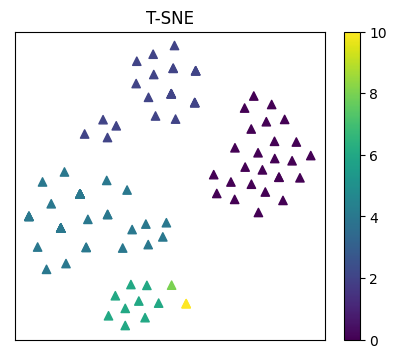

In [175]:
#with T-SNE we reduces complexity by taking space from 14 dimensions to 2 for graphical representation
data_reduced =ut.t_sne(X, n_components=2, n_iter=500, n_iter_without_progress=150, n_jobs=2, random_state=0)

#Scatter plot of T-SNE
ut.scatter_plot(data_reduced, c=y, title='T-SNE', cmap='viridis', marker='^')
plt.show()

IPERPIANO DIFFICILMENTE DIVISIBILE

#### Osservazioni:
I valori della variabile X sono stati sostituiti con le *nuove coordinate bidimensionali*, calcolate dall'algoritmo t-SNE per rappresentare i dati in uno spazio a due dimensioni, quindi X non rappresenta più il dataset originale ma la sua rappresentazione a due dimensioni ottenuta dall'algoritmo t-SNE.

Nel nostro caso y è la colonna contenente il numero di zampe quindi il plot mostra nella color bar il numero di zampe, con colore associato, e nell'area del grafico i raggruppamenti relativi. 
I raggruppamenti sembrano 6(in senso orario): 
1. viola 
2. blu notte
3. verde ottanio
4. verde acqua
5. verde lime
6. giallo

Il risultato rispecchia il groupby fatto precedentemente nella sezione 1. Analisi dei dati

<div class="alert alert-info" style= "background-color:white; color:red; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:20px;'> L'algoritmo K-Means </h2>
</div>

Assegna i punti in base alla distanza dal centroide

Argomenti:

**X**: Dati in input come array numpy 2D con shape (n_samples, n_features)

**n_clusters**: Numero di cluster da creare. Valore di default: 7

**init**: Metodo di inizializzazione dei centroidi. Può essere 'k-means++', 'random' o un array di centroidi.
      Valore di default: 'random'
      
**n_init**: Numero di volte che l'algoritmo K-means verrà eseguito con diversi centroidi iniziali.
        Sarà selezionato il risultato migliore. Valore di default: 10
        
**max_iter**: Numero massimo di iterazioni per ogni esecuzione dell'algoritmo. Valore di default: 300

**tol**: Tolleranza di convergenza. L'algoritmo termina quando la variazione di tutti i centroidi è inferiore a tol. Valore di default: 1e-4
         
**random_state**: Seed utilizzato dal generatore di numeri casuali. Valore di default: 0.
    
Risultato:
- y_km_clustering: Etichette di cluster per ogni campione in X come array numpy 1D con shape (n_samples,)

### K-Means con init 'random'

#### Osservazioni:
Inizializzazione causale dei centroidi 

**Centroidi** = punti geometrici che rappresentano il centro di massa di un cluster

**Cluster** = insiemi di punti simili che vengono raggruppati insieme dall'algoritmo di clustering

In [176]:
#take data's T-Sne
X = data_reduced

#K-Means - init 'random' (selected 7 clusters to compare with class.csv)
kmeans, y_km_clustering= ut.km_clust(X, n_clusters=7, init='random', 
                                           n_init=10, max_iter=300, tol=1e-4, random_state=0)
#NB:
#I can call the 2 vars how I want to recall two results of def.
#es: km e y_km == kmeans, y_km_clustering
#es: k e array == kmeans, y_km_clustering

Etichette univoche dei cluster: [1 2 3 4 5 6 7]


In [177]:
#Extract the algorithm's results
df_cl=ut.results_group(X, df_new2, y_km_clustering, 'K-Mean')

Algoritmo K-Mean 

Pred Labels 1
bass (persico)
carp (carpa)
catfish (pesce gatto)
chub (pesce cavedano)
clam (mollusco)
dogfish (squalo)
dolphin (delfino)
haddock (pesce eglefino)
herring (aringa)
octopus (polpo)
pike (luccio)
piranha (piranha)
pitviper (vipera)
porpoise (focena)
seahorse (cavalluccio marino)
seal (foca)
sealion (leone marino)
seasnake (serpente di mare)
seawasp (medusa)
slowworm (orbettino)
slug (lumaca)
sole (sogliola)
starfish (stella marina)
stingray (razza)
tuna (tonno)
worm (verme)
Totale: 26 

Pred Labels 2
chicken (pollo)
crow (corvo)
dove (piccione)
duck (anatra)
flamingo (fenicottero)
gull (gabbiano)
hawk (falco)
kiwi (uccello kiwi)
lark (allodola)
ostrich (struzzo)
parakeet (parrocchetto)
penguin (pinguino)
pheasant (fagiano)
rhea (uccello nandù)
skimmer (uccello skimmer)
skua (uccello skua)
sparrow (passero)
swan (cigno)
vulture (avvoltoio)
wren (uccello scricciolo)
Totale: 20 

Pred Labels 3
aardvark (oritteropo)
bear (orso)
cheetah (ghepardo)
leopard (le

In [216]:
#df_cl

### K-Means con init 'k-means++'
kmeans ++ definisce tante inizializzazioni e seleziona quella che massimizza l'inerzia 

In [178]:
#K-Means - init 'k-means++' (selected 7 clusters to compare with class.csv)
kmeans, y_kmplus_clustering = ut.km_clust(X, n_clusters=7, init='k-means++', 
                                               n_init=10, max_iter=300, tol=1e-4, random_state=0)

Etichette univoche dei cluster: [1 2 3 4 5 6 7]


Etichette univoche dei cluster: [1 2 3 4 5 6 7]
Etichette univoche dei cluster: [1 2 3 4 5 6 7]


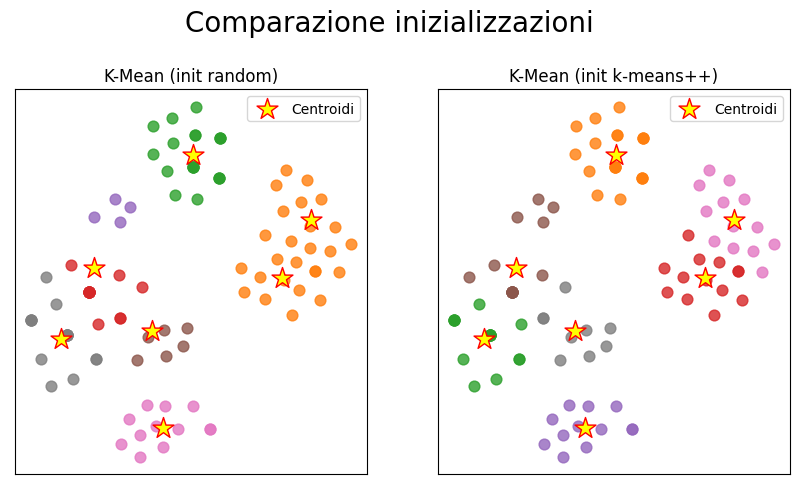

In [179]:
#Comparing different init
kmean, y_km = ut.km_clust(X, 7, 'random') #NB:the other parameters are preset, don't need to be specified
kmean, y_kmplus = ut.km_clust(X, 7, 'k-means++') #NB:the other parameters are preset, don't need to be specified

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ut.plot_kmean(X,y_km, kmean.cluster_centers_, 'K-Mean (init random)', ax=ax1)
ut.plot_kmean(X,y_kmplus, kmean.cluster_centers_, 'K-Mean (init k-means++)', ax=ax2)
fig.suptitle("Comparazione inizializzazioni", fontsize=20, y=1.04)
plt.show()

#### Osservazioni:
Il risultato delle due differenti inizializzazioni è differente: **K-means++ è più accurata**.

Ad esempio in init random, al centro del grafico, ci sono 4 punti colorati di rosso(1p),rosa(2p) e arancione(1p) che in init kmeans++ invece risultano assegnati più accuratamente e tutti e 4 al colore viola.

In [217]:
#Extract the algorithm's results
df_cl=ut.results_group(X, df_new2, y_kmplus_clustering, 'K-Mean++')

Algoritmo K-Mean++ 

Pred Labels 1
chicken (pollo)
crow (corvo)
dove (piccione)
duck (anatra)
flamingo (fenicottero)
gull (gabbiano)
hawk (falco)
kiwi (uccello kiwi)
lark (allodola)
ostrich (struzzo)
parakeet (parrocchetto)
penguin (pinguino)
pheasant (fagiano)
rhea (uccello nandù)
skimmer (uccello skimmer)
skua (uccello skua)
sparrow (passero)
swan (cigno)
vulture (avvoltoio)
wren (uccello scricciolo)
Totale: 20 

Pred Labels 2
aardvark (oritteropo)
antelope (antilope)
boar (cinghiale)
buffalo (bufalo)
calf (vitello)
cavy (cavia)
deer (cervo)
elephant (elefante)
giraffe (giraffa)
goat (capra)
gorilla (gorilla)
hamster (criceto)
hare (lepre)
oryx (orice)
pony (pony)
reindeer (renna)
vole (roditore)
wallaby (canguro)
Totale: 18 

Pred Labels 3
bass (persico)
dogfish (squalo)
dolphin (delfino)
herring (aringa)
pike (luccio)
piranha (piranha)
pitviper (vipera)
porpoise (focena)
seal (foca)
sealion (leone marino)
slowworm (orbettino)
stingray (razza)
tuna (tonno)
Totale: 13 

Pred Labels 4

In [218]:
#Animale + cluster
#df_cl

In [219]:
df_real = df_new.iloc[:, [0, -1]]
df_real = df_real.rename(columns={'animal_name (nome_animale)': 'Animal', 'class_type (tipo_classe)': 'Real labels'})
#df_real.head(1)

df_pred = df_cl.copy()
df_pred['Pred Labels'] = df_pred['Pred Labels'].astype('int64')
#df_pred.head(1)

merged_df = pd.merge(df_real, df_pred, on='Animal')
merged_df.head(1)

,Animal,Real labels,Pred Labels
0,aardvark (oritteropo),1,2


In [256]:
merged_df.to_csv('k_meanplus_merge.csv', index=False)

[[25  7  9  0  0  0  0]
 [20  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0]
 [13  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0]
 [10  0  0  0  0  0  0]]


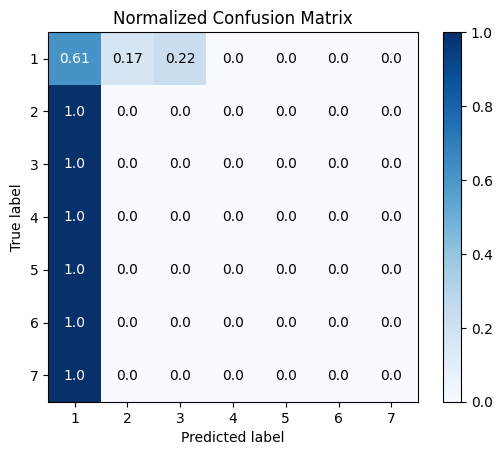

Accuratezza: 0.248
              precision    recall  f1-score   support

           1       0.29      0.61      0.40        41
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        10

    accuracy                           0.25       101
   macro avg       0.04      0.09      0.06       101
weighted avg       0.12      0.25      0.16       101



In [257]:
# ottieni le etichette reali e predette
true_labels = merged_df['Real labels']
pred_labels = merged_df['Pred Labels']
# ottieni la confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, pred_labels)
print(cm)
#pip install scikit-plot
import scikitplot as skplt

# visualizza la confusion matrix
skplt.metrics.plot_confusion_matrix(true_labels, pred_labels, normalize=True)
plt.show()

from sklearn.metrics import accuracy_score, classification_report
acc = accuracy_score(true_labels, pred_labels)
print("Accuratezza: {:.3f}".format(acc))

report=classification_report(true_labels, pred_labels)
print(report)

### Elbow Method

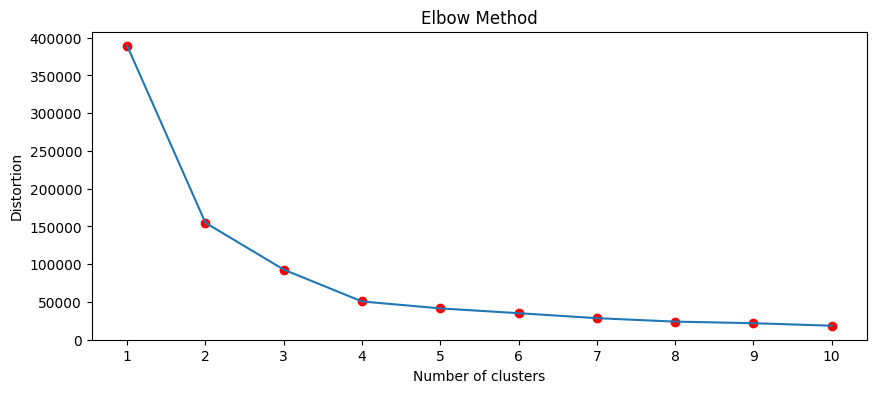

Inertia: 28510.48


In [258]:
#Elbow Method
kmeans.inertia_ #ex kmplus_clustering.inertia_

inertias = []
for i in np.arange(1,11):
    km = KMeans(n_clusters= i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    inertias.append(km.inertia_)

#plotting inertias values
plt.figure(1 , figsize = (10 ,4))
plt.plot(np.arange(1,11),inertias)
plt.scatter(np.arange(1,11),inertias, color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.xticks(np.arange(1,11))
plt.show()

print('Inertia: %.2f' % kmeans.inertia_)

#### Osservazioni:
Il metodo suggerisce sommariamento il numero ottimale di clusters, in questo caso pari a 4

### Silhouette score

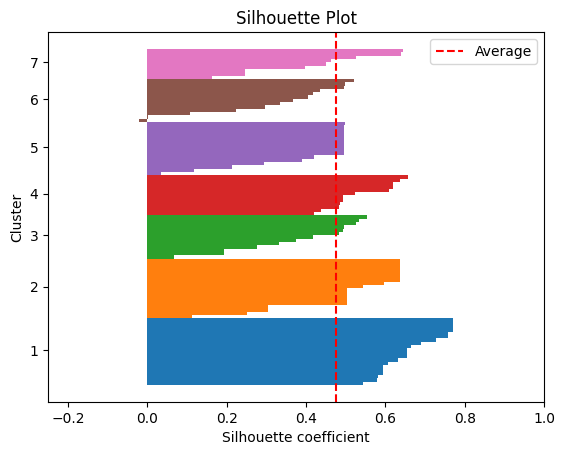

Media:0.477


In [259]:
ut.plot_silhouette(X, kmeans, title='Silhouette Plot')

DA RISCRIVERE!!

#### Osservazioni:

Dal grafico possiamo capire che, non essendoci valori inferiori allo zero, non ci sono punti in cluster errati. I raggrupamenti migliori sono quelli che hanno molti punti vicino alla media: blu, arancione, rossa, marrone. I restanti: verde, viola e rosa risultano invece i raggruppamenti più problematici. 
In conclusione, il profilo di siluette non è dei migliori, benchè il punteggio di silhouette di ciascun cluster è superiore alla media, ci sono ampie fluttuazioni nelle dimensioni dei diversi raggruppamenti, che hanno inoltre spessore differente e profili disomogenei.

https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/


Giusto per vedere come cambia il Silouette score, impostiamo 3 cluster invece di 7.

In [260]:
#K-Means - init 'k-means++' (selected 3 clusters to compare with 7 clusters)
kmeans, y_kmplus_clustering = ut.km_clust(X, n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=0)

Etichette univoche dei cluster: [1 2 3]


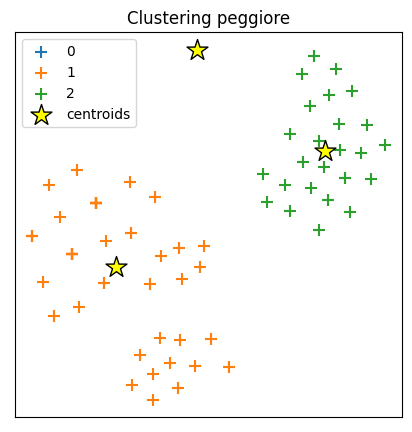

In [261]:
#Bad clustering
fig = plt.figure(figsize=(5, 5))
for i, c in enumerate(np.unique(kmeans.labels_)):
    plt.scatter(X[y_kmplus_clustering == c, 0],
            X[y_kmplus_clustering == c, 1],
            s=67,
            color=plt.cm.tab10(c),
            marker='+',
            label=str(c))

plt.title('Clustering peggiore')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=250, marker='*', color='yellow', edgecolor='black', label='centroids')
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()

RISCRIVERE!!! 

#### Osservazioni:
Dal grafico, ancor prima di procedere con il plot del Silhouette score, è già evidente che esistono punti assegnati in maniera errata. Ne sono esempi: l'unico punto blu vicino agli arancioni o il mix di 3 arancioni e 1 verde al centro del grafico. 

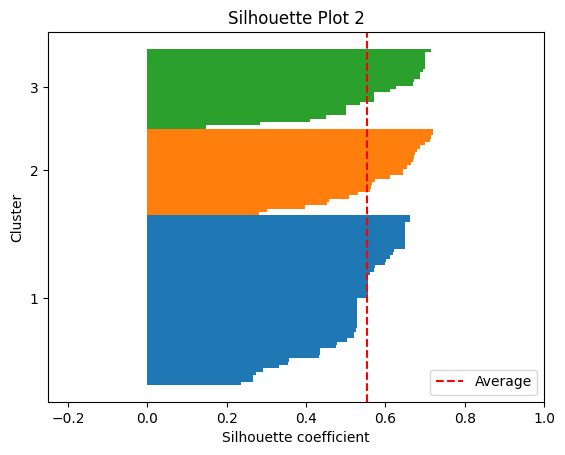

Media:0.553


In [262]:
ut.plot_silhouette(X, kmeans, title='Silhouette Plot 2')

#### Osservazioni:

Il grafico conferma che 3 è il numero di cluster sbagliato perchè ci sono valori inferiori a zero, cioè punti assegnati a cluster errati, ci sono inoltre dimensioni eterogenee nei raggruppamenti e infine i profili di silouette sono molto frastagliati.

https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/

<div class="alert alert-info" style= "background-color:white; color:blue; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:20px;'> Il Clustering gerarchico - Agglomerative Clustering</h2>
</div>

Aggrega per vicinanza di punti e vicinanza di cluster in modo gerarchico fino ad arrivare al numero di cluster impostato 

In [263]:
#take data's T-Sne
X = data_reduced

#AgglomerativeClustering (selected 7 clusters to compare with class.csv)
y_ac_blob_s = ut.agglomerative_clust(X, n_clusters=7, affinity='euclidean', linkage='single')
y_ac_blob_c = ut.agglomerative_clust(X, n_clusters=7, affinity='euclidean', linkage='complete')
y_ac_blob_a = ut.agglomerative_clust(X, n_clusters=7, affinity='cosine', linkage='average')

Etichette univoche dei cluster: [1 2 3 4 5 6 7]
Etichette univoche dei cluster: [1 2 3 4 5 6 7]
Etichette univoche dei cluster: [1 2 3 4 5 6 7]


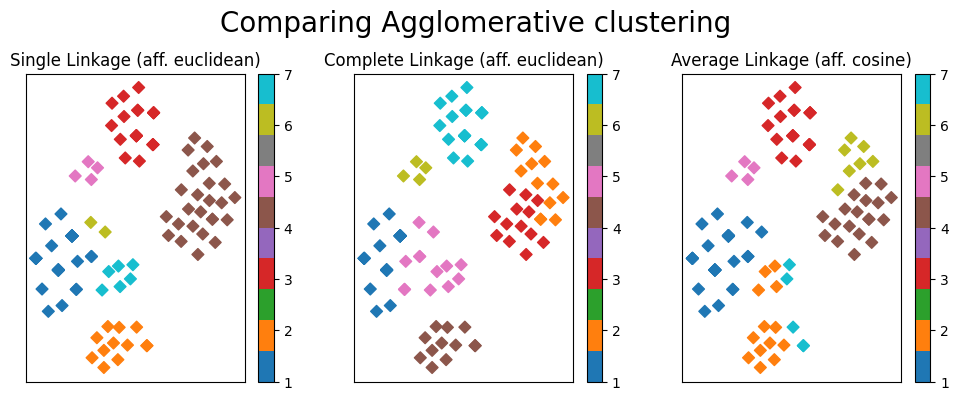

In [264]:
#Comparing different way to group data
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ut.scatter_plot(X, c=y_ac_blob_s[1], title='Single Linkage (aff. euclidean)', cmap='tab10', marker='D', ax=ax1)
ut.scatter_plot(X, c=y_ac_blob_c[1], title='Complete Linkage (aff. euclidean)', cmap='tab10', marker='D', ax=ax2)
ut.scatter_plot(X, c=y_ac_blob_a[1], title='Average Linkage (aff. cosine)', cmap='tab10', marker='D', ax=ax3)
fig.suptitle("Comparing Agglomerative clustering", fontsize=20, y=1.04)
plt.show()

#se s'incasina rimetti c=y_ac_blob_s[1], c=y_ac_blob_c[1]
#Similiarity method as cosine

#### Osservazioni:
Il grafico mostra che la prima forma di raggruppamento, la "x linkage" raggruppa i punti in modo più omogeneo ai rispettivi cluster. Nel raggruppamento "x linkage" invece si nota come i raggruppamneti siano disomogenei.

Scegliamo quindi di considerare il raggruppamento per vicinanza maggiore cioè il **x Linkage**, visto che è più probabile che animali con caratteristiche simili facciano parte della stessa categoria.

In [265]:
#Extract the algorithm's results of SINGLE LINKAGE
df_cl=ut.results_group(X, df_new2, y_ac_blob_s[1], 'AgglomerativeClustering Single Linkage')

Algoritmo AgglomerativeClustering Single Linkage 

Pred Labels 1
aardvark (oritteropo)
antelope (antilope)
bear (orso)
boar (cinghiale)
buffalo (bufalo)
calf (vitello)
cavy (cavia)
cheetah (ghepardo)
deer (cervo)
elephant (elefante)
giraffe (giraffa)
goat (capra)
gorilla (gorilla)
hamster (criceto)
hare (lepre)
leopard (leopardo)
lion (leone)
lynx (lince)
mole (talpa)
mongoose (mangusta)
opossum (opossum)
oryx (orice)
polecat (puzzola)
pony (pony)
puma (puma)
pussycat (micio)
raccoon (procione)
reindeer (renna)
vole (roditore)
wallaby (canguro)
wolf (lupo)
Totale: 31 

Pred Labels 2
crab (granchio)
crayfish (gambero)
flea (pulce)
gnat (moscerino)
honeybee (ape)
housefly (mosca domestica)
ladybird (coccinella)
lobster (aragosta)
moth (falena)
scorpion (scorpione)
termite (termite)
wasp (vespa)
Totale: 12 

Pred Labels 3
chicken (pollo)
crow (corvo)
dove (piccione)
duck (anatra)
flamingo (fenicottero)
gull (gabbiano)
hawk (falco)
kiwi (uccello kiwi)
lark (allodola)
ostrich (struzzo)
para

In [266]:
#Animale + cluster
#df_cl 

In [267]:
df_real = df_new.iloc[:, [0, -1]]
df_real = df_real.rename(columns={'animal_name (nome_animale)': 'Animal', 'class_type (tipo_classe)': 'Real labels'})
#df_real.head(1)

df_pred = df_cl.copy()
df_pred['Pred Labels'] = df_pred['Pred Labels'].astype('int64')
#df_pred.head(1)

merged_df = pd.merge(df_real, df_pred, on='Animal')
merged_df.head(1)

,Animal,Real labels,Pred Labels
0,aardvark (oritteropo),1,1


In [268]:
merged_df.to_csv('AgglomerSingle_merge.csv', index=False)

[[31  0  0  4  4  2  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0  3  0  0  2]
 [ 0  0  0 13  0  0  0]
 [ 0  0  0  0  0  0  4]
 [ 0  8  0  0  0  0  0]
 [ 0  4  0  6  0  0  0]]


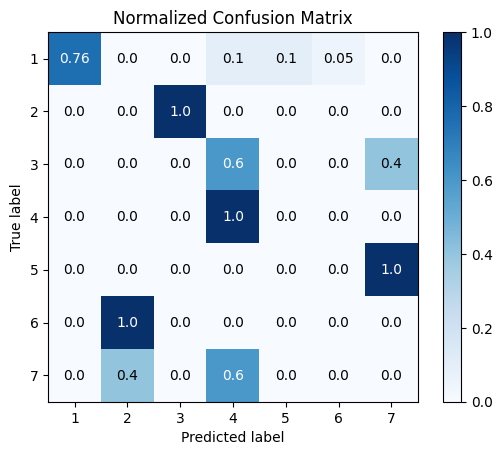

Accuratezza: 0.436
              precision    recall  f1-score   support

           1       1.00      0.76      0.86        41
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         5
           4       0.50      1.00      0.67        13
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        10

    accuracy                           0.44       101
   macro avg       0.21      0.25      0.22       101
weighted avg       0.47      0.44      0.44       101



In [269]:
# ottieni le etichette reali e predette
true_labels = merged_df['Real labels']
pred_labels = merged_df['Pred Labels']
# ottieni la confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, pred_labels)
print(cm)
#pip install scikit-plot
import scikitplot as skplt

# visualizza la confusion matrix
skplt.metrics.plot_confusion_matrix(true_labels, pred_labels, normalize=True)
plt.show()

from sklearn.metrics import accuracy_score, classification_report
acc = accuracy_score(true_labels, pred_labels)
print("Accuratezza: {:.3f}".format(acc))

report=classification_report(true_labels, pred_labels)
print(report)

<div class="alert alert-info" style= "background-color:white; color:orange; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:20px;'> Il DBScan </h2>
</div>

In [270]:
#utilizza la stima della densità, identifica regioni di punti + dense

In [271]:
#take data's T-Sne
X = data_reduced

#dbscan clustering 
dbscan, labels = ut.dbscan_clust(X, eps= 1.5, min_samples= 5, metric='euclidean')

Etichette univoche dei cluster: [1 2 3]


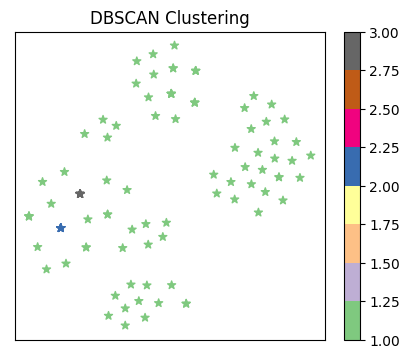

In [272]:
#Scatter plot
ut.scatter_plot(X, c=labels, title='DBSCAN Clustering', cmap='Accent', marker='*')
plt.show()

#### Osservazioni:
Il grafico mostra che i punti non sono assegnati in modo corretto ai rispettivi cluster, ad esempio almeno un punto verde acqua potrebbe essere assegnato al cluster rosa.

In [273]:
#Extract the algorithm's results
df_cl=ut.results_group(X, df_new2, labels , 'DB Scan')

Algoritmo DB Scan 

Pred Labels 1
aardvark (oritteropo)
bass (persico)
calf (vitello)
carp (carpa)
catfish (pesce gatto)
cavy (cavia)
chicken (pollo)
chub (pesce cavedano)
clam (mollusco)
crab (granchio)
crayfish (gambero)
crow (corvo)
dogfish (squalo)
dolphin (delfino)
dove (piccione)
duck (anatra)
flamingo (fenicottero)
flea (pulce)
frog (rana)
frog2 (rana vel)
fruitbat (volpe volante)
girl (ragazza)
gnat (moscerino)
goat (capra)
gorilla (gorilla)
gull (gabbiano)
haddock (pesce eglefino)
hamster (criceto)
hare (lepre)
hawk (falco)
herring (aringa)
honeybee (ape)
housefly (mosca domestica)
kiwi (uccello kiwi)
ladybird (coccinella)
lark (allodola)
lobster (aragosta)
mink (visone)
mole (talpa)
moth (falena)
newt (tritone)
octopus (polpo)
opossum (opossum)
ostrich (struzzo)
parakeet (parrocchetto)
penguin (pinguino)
pheasant (fagiano)
pike (luccio)
piranha (piranha)
pitviper (vipera)
platypus (ornitorinco)
pony (pony)
porpoise (focena)
pussycat (micio)
reindeer (renna)
rhea (uccello nand

In [274]:
#Animale + cluster
#df_cl 

In [275]:
df_real = df_new.iloc[:, [0, -1]]
df_real = df_real.rename(columns={'animal_name (nome_animale)': 'Animal', 'class_type (tipo_classe)': 'Real labels'})
#df_real.head(1)

df_pred = df_cl.copy()
df_pred['Pred Labels'] = df_pred['Pred Labels'].astype('int64')
#df_pred.head(1)

merged_df = pd.merge(df_real, df_pred, on='Animal')
merged_df.head(1)

,Animal,Real labels,Pred Labels
0,aardvark (oritteropo),1,1


In [276]:
merged_df.to_csv('DBscan_merge.csv', index=False)

[[25  7  9  0  0  0  0]
 [20  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0]
 [13  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0]
 [10  0  0  0  0  0  0]]


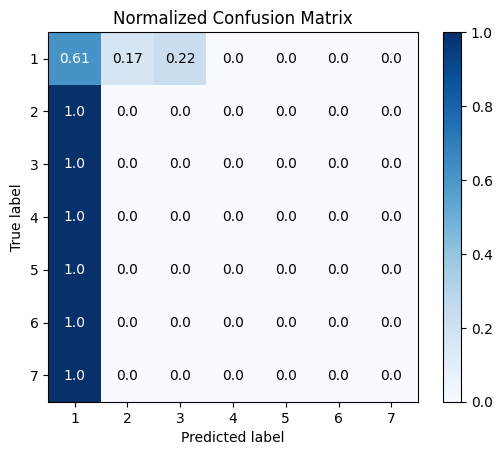

Accuratezza: 0.248
              precision    recall  f1-score   support

           1       0.29      0.61      0.40        41
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        10

    accuracy                           0.25       101
   macro avg       0.04      0.09      0.06       101
weighted avg       0.12      0.25      0.16       101



In [277]:
# ottieni le etichette reali e predette
true_labels = merged_df['Real labels']
pred_labels = merged_df['Pred Labels']
# ottieni la confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, pred_labels)
print(cm)
#pip install scikit-plot
import scikitplot as skplt

# visualizza la confusion matrix
skplt.metrics.plot_confusion_matrix(true_labels, pred_labels, normalize=True)
plt.show()

from sklearn.metrics import accuracy_score, classification_report
acc = accuracy_score(true_labels, pred_labels)
print("Accuratezza: {:.3f}".format(acc))

report=classification_report(true_labels, pred_labels)
print(report)

<div class="alert alert-info" style="background-color:LightGreen; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:25px; text-decoration: underline'> 3. Risultati a confronto </h2>
</div>

In [250]:
X = data_reduced

In [251]:
kmeans, y_kmplus_clustering = ut.km_clust(X, n_clusters=7, init='k-means++', 
                                               n_init=10, max_iter=300, tol=1e-4, random_state=0)
y_ac_blob_s = ut.agglomerative_clust(X, n_clusters=7, affinity='euclidean', linkage='single')
dbscan, labels = ut.dbscan_clust(X, eps= 1.5, min_samples= 5, metric='euclidean')

Etichette univoche dei cluster: [1 2 3 4 5 6 7]
Etichette univoche dei cluster: [1 2 3 4 5 6 7]
Etichette univoche dei cluster: [1 2 3]


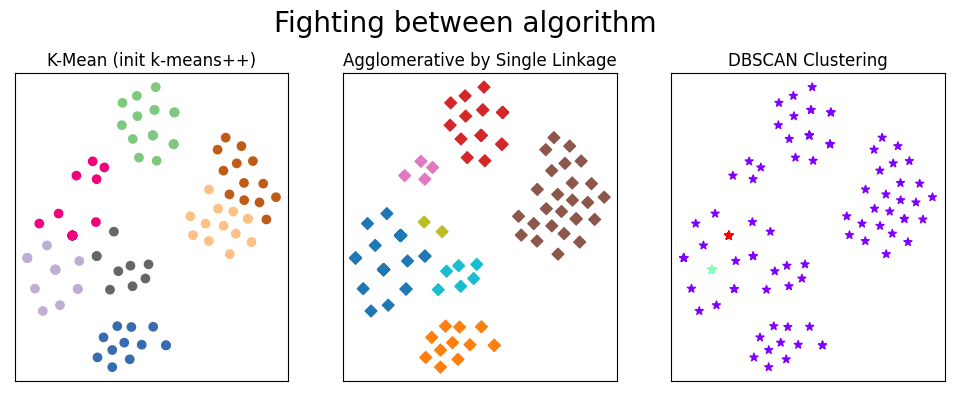

In [252]:
#Comparing different way to group data
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ut.scatter_plot(X, c=y_kmplus, title='K-Mean (init k-means++)', cmap='Accent', marker='o', colorbar=False, ax=ax1)
ut.scatter_plot(X, c=y_ac_blob_s[1], title='Agglomerative by Single Linkage', cmap='tab10', marker='D', colorbar=False, ax=ax2)
ut.scatter_plot(X, c=labels, title='DBSCAN Clustering', cmap='rainbow', marker='*', colorbar=False, ax=ax3)
fig.suptitle("Fighting between algorithm", fontsize=20, y=1.04)
plt.show()

#edgecolor='red',

In [255]:
'''
from sklearn.metrics import mean_squared_error
print(np.unique(model.labels_))
lables = labels-1
score = mean_squared_error(labels,model.labels_)
abs_error = np.sqrt(score)
print(abs_error)
'''

'\nfrom sklearn.metrics import mean_squared_error\nprint(np.unique(model.labels_))\nlables = labels-1\nscore = mean_squared_error(labels,model.labels_)\nabs_error = np.sqrt(score)\nprint(abs_error)\n'

In [254]:
print(np.unique(y_km_clustering))
lables = labels-1
score = mean_squared_error(labels,y_km_clustering)#y_kmplus_clustering 3.095
abs_error = np.sqrt(score)
print(abs_error)

[1 2 3 4 5 6 7]
3.219679585558688


In [214]:
print(np.unique(y_ac_blob_s[1]))
lables = labels-1
score = mean_squared_error(labels,y_ac_blob_s[1])
abs_error = np.sqrt(score)
print(abs_error)

[1 2 3 4 5 6 7]
2.6307398349528825


In [215]:
print(np.unique(labels))
lables = lables-1
score = mean_squared_error(labels,labels)
abs_error = np.sqrt(score)
print(abs_error)

[1 2 3]
0.0


In [ ]:
#pip install virtualenv ???